#### 데이터 불러오기

In [1]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import matplotlib.font_manager as fm
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
# !pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
# !pip install optuna
import optuna
import xgboost as xgb
# !pip install catboost
# !pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
# !pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
# !pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


#### 원본 데이터를 통해 train, test 데이터 늘리기 (학습 정확도 상승을 위해)

In [2]:
train_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train.csv')
train_data_original = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train_dataset.csv')

train = pd.concat([train_data, train_data_original]).reset_index(drop = True)

In [3]:
test_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test.csv')
test_data_original = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test_dataset.csv')

test = pd.concat([test_data, test_data_original]).reset_index(drop = True)

In [4]:
import pandas as pd

def remove_duplicates(df):
    # Identify duplicates
    duplicates = df[df.duplicated()]

    # Print number of duplicates found and removed
    print(f"Number of duplicates found and removed: {len(duplicates)}")

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()
    df_no_duplicates.reset_index(drop=True, inplace=True)

    return df_no_duplicates

train = remove_duplicates(train)
test = remove_duplicates(test)

Number of duplicates found and removed: 5517
Number of duplicates found and removed: 998


In [5]:
train = train.drop(columns='id', axis=1)
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192718,40,170,65,77.0,1.5,1.5,1,1,110,62,91,187,84,79,91,16.1,1,0.9,28,43,36,1,1
192719,40,165,60,80.0,0.4,0.6,1,1,107,60,93,144,53,61,72,12.3,1,0.5,18,18,21,1,0
192720,45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0,0
192721,40,160,55,75.0,1.5,1.5,1,1,95,69,102,206,48,79,116,12.0,1,0.6,24,20,17,0,1


In [6]:
test = test.drop(columns='id', axis=1)
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121876,60,165,65,82.0,0.7,1.0,1,1,101,68,140,177,131,41,110,13.5,1,0.8,78,75,33,0
121877,60,155,70,93.0,0.8,1.0,1,1,134,70,97,165,259,53,60,13.9,1,0.7,19,28,28,1
121878,40,155,50,67.2,0.9,0.8,1,1,134,80,91,206,50,64,131,13.4,1,0.7,16,10,14,0
121879,35,165,70,76.1,1.0,1.0,1,1,114,68,109,201,43,74,118,14.3,1,1.2,19,28,30,1


### 결측치 (Missing Values) 확인

In [7]:
global device
device = 'cpu'

table = PrettyTable()

table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %']
for column in train.columns:
    data_type = str(train[column].dtype)
    non_null_count_train= np.round(100-train[column].count()/train.shape[0]*100,1)
    if column!='smoking':
        non_null_count_test = np.round(100-test[column].count()/test.shape[0]*100,1)
    else:
        non_null_count_test="NA"
    table.add_row([column, data_type, non_null_count_train,non_null_count_test])
print(table)

+---------------------+-----------+-----------------+----------------+
|       Feature       | Data Type | Train Missing % | Test Missing % |
+---------------------+-----------+-----------------+----------------+
|         age         |   int64   |       0.0       |      0.0       |
|      height(cm)     |   int64   |       0.0       |      0.0       |
|      weight(kg)     |   int64   |       0.0       |      0.0       |
|      waist(cm)      |  float64  |       0.0       |      0.0       |
|    eyesight(left)   |  float64  |       0.0       |      0.0       |
|   eyesight(right)   |  float64  |       0.0       |      0.0       |
|    hearing(left)    |   int64   |       0.0       |      0.0       |
|    hearing(right)   |   int64   |       0.0       |      0.0       |
|       systolic      |   int64   |       0.0       |      0.0       |
|      relaxation     |   int64   |       0.0       |      0.0       |
| fasting blood sugar |   int64   |       0.0       |      0.0       |
|     

### EDA

#### Target Distribution

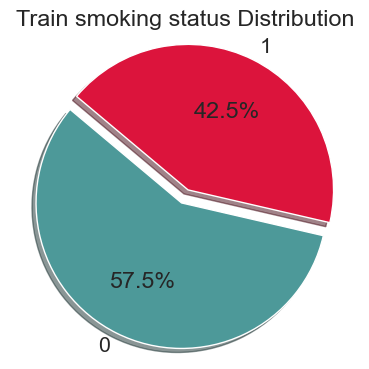

In [59]:
def plot_pie_chart(data, title):
    data_counts = data['smoking'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [ (0.3, 0.6, 0.6), 'crimson']  
    explode = (0.1, 0)  

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal') 
    ax.set_title(title)
    
    plt.tight_layout()
    plt.show()


plot_pie_chart(train, "Train smoking status Distribution")


#### Numerical Feature Distributions

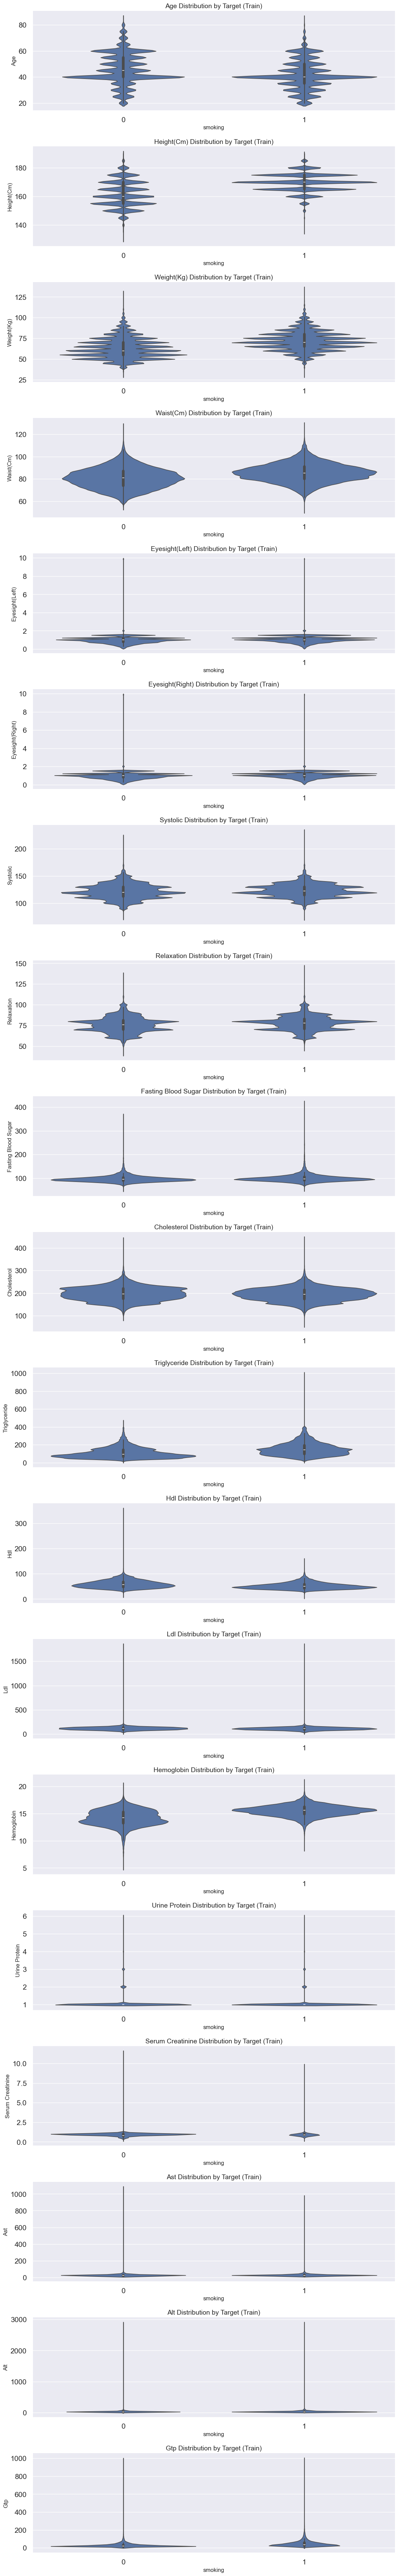

In [60]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique() > 2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, figsize=(12, 4 * n_rows))
sns.set_palette("Set3")
for i, col in enumerate(cont_cols):
    sns.violinplot(x='smoking', y=col, data=train, ax=axs[i])
    axs[i].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i].set_xlabel('smoking', fontsize=12)
    axs[i].set_ylabel(col.title(), fontsize=12)
    sns.despine()

fig.tight_layout()

plt.show()

### FEATURE ENGINEERING

#### Data Preprocessing

In [61]:
def create_extra_features(df):
    best = np.where(df['hearing(left)'] < df['hearing(right)'], 
                    df['hearing(left)'],  df['hearing(right)'])
    worst = np.where(df['hearing(left)'] < df['hearing(right)'], 
                     df['hearing(right)'],  df['hearing(left)'])
    df['hearing(left)'] = best - 1
    df['hearing(right)'] = worst - 1
    
    df['eyesight(left)'] = np.where(df['eyesight(left)'] > 9, 0, df['eyesight(left)'])
    df['eyesight(right)'] = np.where(df['eyesight(right)'] > 9, 0, df['eyesight(right)'])
    best = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                    df['eyesight(left)'],  df['eyesight(right)'])
    worst = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                     df['eyesight(right)'],  df['eyesight(left)'])
    df['eyesight(left)'] = best
    df['eyesight(right)'] = worst
    ##
    df['Gtp'] = np.clip(df['Gtp'], 0, 300)
    df['HDL'] = np.clip(df['HDL'], 0, 110)
    df['LDL'] = np.clip(df['LDL'], 0, 200)
    df['ALT'] = np.clip(df['ALT'], 0, 150)
    df['AST'] = np.clip(df['AST'], 0, 100)
    df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 3)  
    
    return df

train=create_extra_features(train)
test=create_extra_features(test)

In [62]:
def min_max_scaler(train, test, column):
    sc=MinMaxScaler()
    
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    
    return train,test  

# 원-핫 인코딩
def OHE(train_df,test_df,cols,target):
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }
def rmse(y1,y2):
    ''' RMSE Evaluator'''
    return(np.sqrt(mean_squared_error(np.array(y1),np.array(y2))))

def store_missing_rows(df, features):
    '''Function stores where missing values are located for given set of features'''
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_numerical(train,test,target, max_iterations=10):
    '''Iterative Missing Imputer: Updates filled missing values iteratively using CatBoost Algorithm'''
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)
        
    
    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    features=[ f for f in df.columns if df[f].isna().sum()>0]
    if len(features)>0:
        # Step 1: Store the instances with missing values in each feature
        missing_rows = store_missing_rows(df, features)

        # Step 2: Initially fill all missing values with "Missing"
        for f in features:
            df[f]=df[f].fillna(df[f].mean())

        cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
        dictionary = {feature: [] for feature in features}

        for iteration in tqdm(range(max_iterations), desc="Iterations"):
            for feature in features:
                # Skip features with no missing values
                rows_miss = missing_rows[feature].index

                missing_temp = df.loc[rows_miss].copy()
                non_missing_temp = df.drop(index=rows_miss).copy()
                y_pred_prev=missing_temp[feature]
                missing_temp = missing_temp.drop(columns=[feature])


                # Step 3: Use the remaining features to predict missing values using Random Forests
                X_train = non_missing_temp.drop(columns=[feature])
                y_train = non_missing_temp[[feature]]

                model= lgb.LGBMRegressor(**lgb_params)
                model.fit(X_train, y_train)

                # Step 4: Predict missing values for the feature and update all N features
                y_pred = model.predict(missing_temp)
                df.loc[rows_miss, feature] = y_pred
                error_minimize=rmse(y_pred,y_pred_prev)
                dictionary[feature].append(error_minimize)  # Append the error_minimize value

        train[features] = np.array(df.iloc[:train.shape[0]][features])
        test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

#### Numerical Transformations (로그 변환 등)

In [63]:
cont_cols = [f for f in train.columns if pd.api.types.is_numeric_dtype(train[f]) and train[f].nunique() >2]
cat_cols = [f for f in train.columns if train[f].nunique()!=2 and f not in ['smoking']]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=0
overall_best_col='none'

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Initial ROC_AUC', 'Transformation', 'Tranformed ROC_AUC']

    for col in cont_cols:
        
        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])
        
        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        scaled_data = transformer.fit_transform(combined_data + epsilon)

        train_copy["bx_cx_" + col] = scaled_data[:train_copy.shape[0]]
        test_copy["bx_cx_" + col] = scaled_data[train_copy.shape[0]:]
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        
        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col,  "pow_"+col , "pow2_"+col,"log_sqrt"+col]
        
        train_copy,test_copy = fill_missing_numerical(train_copy,test_copy,"defects",5)
        
        pca = TruncatedSVD(n_components=1)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")
        
        test_copy = test_copy.reset_index(drop=True)
        
        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')
        
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
        auc_scores = []
        
        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values
            
            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =   LogisticRegression() # since it is a large dataset, Logistic Regression would be a good option to save time
                model.fit(X_train,y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val, y_pred))
            auc_scores.append((f, np.mean(auc)))
            
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f

            if f == col:
                orig_auc = np.mean(auc)
                
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        
        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_auc,best_col ,best_auc])
    print(table)   
    print("overall best CV ROC AUC score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, "smoking")

Iterations:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 192723, number of used features: 29
[LightGBM] [Info] Start training from score 0.425019


Iterations:  20%|██        | 1/5 [00:00<00:03,  1.05it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 192723, number of used features: 29
[LightGBM] [Info] Start training from score 0.425019


Iterations:  40%|████      | 2/5 [00:01<00:02,  1.03it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 192723, number of used features: 29
[LightGBM] [Info] Start training from score 0.425019


Iterations:  60%|██████    | 3/5 [00:02<00:01,  1.03it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 192723, number of used features: 29
[LightGBM] [Info] Start training from score 0.425019


Iterations:  80%|████████  | 4/5 [00:03<00:00,  1.03it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2267
[LightGBM] [Info] Number of data points in the train set: 192723, number of used features: 29
[LightGBM] [Info] Start training from score 0.425019


Iterations: 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]


+---------------------+--------------------+---------------------+--------------------+
|       Feature       |  Initial ROC_AUC   |    Transformation   | Tranformed ROC_AUC |
+---------------------+--------------------+---------------------+--------------------+
|         age         | 0.6153010625151015 |         age         | 0.6153010625151015 |
|      height(cm)     | 0.7531335297614603 |      height(cm)     | 0.7531335297614603 |
|      weight(kg)     | 0.7079867509018658 |      weight(kg)     | 0.7079867509018658 |
|      waist(cm)      | 0.6508305863480158 |      waist(cm)      | 0.6508305863480158 |
|    eyesight(left)   | 0.579464517903229  |    eyesight(left)   | 0.579464517903229  |
|   eyesight(right)   | 0.5810586555846605 |   eyesight(right)   | 0.5810586555846605 |
|       systolic      | 0.5388086994036667 |       systolic      | 0.5388086994036667 |
|      relaxation     | 0.5664235515547296 |      relaxation     | 0.5664235515547296 |
| fasting blood sugar | 0.565113

#### Discrete Feature -> Categorical

In [64]:
selected_cols=[]
for col in cat_cols:
    train['cat_'+col]=train[col]
    test['cat_'+col]=test[col]
    selected_cols.append('cat_'+col)

In [65]:
def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))
        
        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)
    
    return train_copy, test_copy

def cat_encoding(train, test,cat_cols, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Feature', 'ROC AUC Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols:
        cat_labels = train_copy.groupby([feature])[target].mean().sort_values().index
        cat_labels2 = {k: i for i, k in enumerate(cat_labels, 0)}
        train_copy[feature + "_target"] = train_copy[feature].map(cat_labels2)
        test_copy[feature + "_target"] = test_copy[feature].map(cat_labels2)

        dic = train_copy[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train_copy[feature].map(dic)
        test_copy[feature + "_count"] = test_copy[feature].map(dic)

        dic2=train_copy[feature].value_counts().to_dict()
        list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
        dic3=dict(zip(list(dic2.keys()),list1))
        train_copy[feature+"_count_label"]=train_copy[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test_copy[feature].replace(dic3).astype(float)

        temp_cols = [feature + "_count", feature + "_count_label"]
        if train_copy[feature].dtype=='O':
            train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            train_copy=train_copy.drop(columns=[feature])
            test_copy=test_copy.drop(columns=[feature])
        else:
            if train_copy[feature].nunique()<=50:
                train_copy[feature]=train_copy[feature].astype(str)+"_"+feature
                test_copy[feature]=test_copy[feature].astype(str)+"_"+feature
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
                train_copy=train_copy.drop(columns=[feature])
                test_copy=test_copy.drop(columns=[feature])
            else:
                train_copy,test_copy=high_freq_ohe(train_copy,test_copy,[feature], target, n_limit=10)
            

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
        print(feature)
    print(table)
    print("overall best CV score: ", overall_best_score)
    return train_copy, test_copy

train, test= cat_encoding(train, test,selected_cols, "smoking")
train, test = fill_missing_numerical(train, test,"smoking",3)

cat_age
cat_height(cm)
cat_weight(kg)
cat_waist(cm)
cat_eyesight(left)
cat_eyesight(right)
cat_systolic
cat_relaxation
cat_fasting blood sugar
cat_Cholesterol
cat_triglyceride
cat_HDL
cat_LDL
cat_hemoglobin
cat_Urine protein
cat_serum creatinine
cat_AST
cat_ALT
cat_Gtp
+-------------------------+-------------------------------------+--------------------+
|         Feature         |           Encoded Feature           |   ROC AUC Score    |
+-------------------------+-------------------------------------+--------------------+
|         cat_age         |            cat_age_count            | 0.6193448851503595 |
|      cat_height(cm)     |         cat_height(cm)_count        | 0.7541779636690394 |
|      cat_weight(kg)     |         cat_weight(kg)_count        | 0.7079529922079254 |
|      cat_waist(cm)      |         cat_waist(cm)_count         | 0.6412649991792173 |
|    cat_eyesight(left)   |       cat_eyesight(left)_count      | 0.5793485408100109 |
|   cat_eyesight(right)   |      c

Iterations:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24176
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 11.237746
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24176
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 28040.806421
[LightGBM] [Warni

Iterations:  33%|███▎      | 1/3 [01:50<03:41, 110.96s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24139
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 11.237746
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24139
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 28040.806421
[LightGBM] [Warni

Iterations:  67%|██████▋   | 2/3 [03:40<01:49, 109.89s/it]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24137
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 11.237746
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24137
[LightGBM] [Info] Number of data points in the train set: 314601, number of used features: 442
[LightGBM] [Info] Start training from score 28040.806421
[LightGBM] [Warni

Iterations: 100%|██████████| 3/3 [07:55<00:00, 158.36s/it]


### Numerical Clustering

In [66]:
table = PrettyTable()
table.field_names = ['Clustered Feature', 'ROC AUC (CV-TRAIN)']
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)
    model = KMeans()

    kmeans = KMeans(n_clusters=10)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))

    
    kf=KFold(n_splits=5, shuffle=True, random_state=42)
    
    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train["smoking"].astype(int).values

    auc=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(x_val)[:,1]
        auc.append(roc_auc_score(y_val,y_pred))
        
    table.add_row([col+"_unimp_cluster_WOE",np.mean(auc)])
    if overall_best_score<np.mean(auc):
        overall_best_score=np.mean(auc)
        overall_best_col=col+"_unimp_cluster_WOE"

print(table)
print("overall best CV score: ", overall_best_score)

+---------------------------------------+--------------------+
|           Clustered Feature           | ROC AUC (CV-TRAIN) |
+---------------------------------------+--------------------+
|         age_unimp_cluster_WOE         | 0.6189801815069776 |
|      height(cm)_unimp_cluster_WOE     | 0.7542023608361975 |
|      weight(kg)_unimp_cluster_WOE     | 0.7079974583437237 |
|      waist(cm)_unimp_cluster_WOE      | 0.6490101880556234 |
|    eyesight(left)_unimp_cluster_WOE   | 0.579402520835678  |
|   eyesight(right)_unimp_cluster_WOE   | 0.5810626314711035 |
|       systolic_unimp_cluster_WOE      | 0.5528058707913498 |
|      relaxation_unimp_cluster_WOE     | 0.5692608912500543 |
| fasting blood sugar_unimp_cluster_WOE | 0.5635042254246605 |
|     Cholesterol_unimp_cluster_WOE     | 0.5393871674104371 |
|     triglyceride_unimp_cluster_WOE    | 0.6938429517631054 |
|         HDL_unimp_cluster_WOE         | 0.6500857027222247 |
|         LDL_unimp_cluster_WOE         | 0.54116702669

### Arithmetic New Features

In [67]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  
        temp_df_test = pd.DataFrame()

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].astype(int).iloc[train_index], train[target].astype(int).iloc[val_index]
                model = LogisticRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_val)[:,1]
                score = roc_auc_score( y_val, y_pred)
                scores.append(score)
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_auc = sorted(SCORES, key=lambda x: x[1],reverse=True)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_auc > best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with ROC AUC Score: {best_auc:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [68]:
new_cols=['height(cm)*hemoglobin',
 'eyesight(left)*Gtp',
 'Gtp/systolic',
 'Gtp/Cholesterol',
 'triglyceride+hemoglobin',
 'HDL/Gtp',
 'Gtp/LDL',
 'hemoglobin+Gtp',
 'Gtp/AST',
 'ALT*Gtp',
 'cat_Gtp/cat_relaxation',
 'cat_fasting blood sugar*cat_Gtp',
 'cat_triglyceride/cat_Gtp_count',
 'cat_HDL*cat_Gtp_count',
 'cat_AST*cat_Gtp',
 'cat_Gtp*cat_height(cm)_count',
 'cat_age_count/cat_Gtp_count',
 'cat_Gtp_count/cat_height(cm)_count',
 'cat_weight(kg)_count/cat_Gtp_count',
 'cat_waist(cm)_count-cat_Gtp_count',
 'cat_eyesight(left)_count/cat_Gtp_count',
 'cat_Gtp_count/cat_eyesight(right)_count',
 'cat_Gtp_count/cat_systolic_count',
 'cat_relaxation_count_label/cat_Gtp_count',
 'cat_Gtp_count/cat_HDL_count_label',
 'cat_hemoglobin_count_label/cat_Gtp_count',
 'cat_Urine protein_count/cat_Gtp_count',
 'cat_serum creatinine_count/cat_Gtp_count',
 'cat_ALT_count*cat_Gtp_count',
 'hemoglobin_unimp_cluster_WOE/waist(cm)_unimp_cluster_WOE',
 'systolic_unimp_cluster_WOE+Gtp_unimp_cluster_WOE',
 'hemoglobin_unimp_cluster_WOE/relaxation_unimp_cluster_WOE',
 'fasting blood sugar_unimp_cluster_WOE*hemoglobin_unimp_cluster_WOE',
 'Cholesterol_unimp_cluster_WOE/hemoglobin_unimp_cluster_WOE',
 'triglyceride_unimp_cluster_WOE+Gtp_unimp_cluster_WOE',
 'HDL_unimp_cluster_WOE*hemoglobin_unimp_cluster_WOE',
 'LDL_unimp_cluster_WOE-Gtp_unimp_cluster_WOE',
 'hemoglobin_unimp_cluster_WOE-Gtp_unimp_cluster_WOE',
 'AST_unimp_cluster_WOE-Gtp_unimp_cluster_WOE',
 'ALT_unimp_cluster_WOE+Gtp_unimp_cluster_WOE']

In [69]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    for expression in expressions_list:
        if expression not in train_df.columns:
            parts = expression.split('+') if '+' in expression else \
                    expression.split('-') if '-' in expression else \
                    expression.split('*') if '*' in expression else \
                    expression.split('/')

            cols = [col for col in parts]

            if cols[0] in train_df.columns and cols[1] in train_df.columns:
                if '+' in expression:
                    train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
                elif '-' in expression:
                    train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
                elif '*' in expression:
                    train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
                elif '/' in expression:
                    train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                    test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)
    
    return train_df, test_df

train, test = apply_arithmetic_operations(train, test, new_cols)

#### Feature Elimination

In [70]:
first_drop=[ f for f in unimportant_features if f in train.columns]
train=train.drop(columns=first_drop)
test=test.drop(columns=first_drop)

In [71]:
final_drop_list=[]

table = PrettyTable()
table.field_names = ['Original', 'Final Transformation', 'ROV AUC CV']
threshold=0.95
best_cols=[]

for col in cont_cols:
    sub_set=[f for f in train.columns if (str(col) in str(f)) and (train[f].nunique()>2)]
    if len(sub_set)>2:
        correlated_features = []

        for i, feature in enumerate(sub_set):
            # Check correlation with all remaining features
            for j in range(i+1, len(sub_set)):
                correlation = np.abs(train[feature].corr(train[sub_set[j]]))
                # If correlation is greater than threshold, add to list of highly correlated features
                if correlation > threshold:
                    correlated_features.append(sub_set[j])

        # Remove duplicate features from the list
        correlated_features = list(set(correlated_features))
        if len(correlated_features)>=2:

            temp_train=train[correlated_features]
            temp_test=test[correlated_features]
            #Scale before applying PCA
            sc=StandardScaler()
            temp_train=sc.fit_transform(temp_train)
            temp_test=sc.transform(temp_test)

            # Initiate PCA
            pca=TruncatedSVD(n_components=1)
            x_pca_train=pca.fit_transform(temp_train)
            x_pca_test=pca.transform(temp_test)
            x_pca_train=pd.DataFrame(x_pca_train, columns=[col+"_pca_comb_final"])
            x_pca_test=pd.DataFrame(x_pca_test, columns=[col+"_pca_comb_final"])
            train=pd.concat([train,x_pca_train],axis='columns')
            test=pd.concat([test,x_pca_test],axis='columns')

            # Clustering
            model = KMeans()
            kmeans = KMeans(n_clusters=10)
            kmeans.fit(np.array(temp_train))
            labels_train = kmeans.labels_

            train[col+'_final_cluster'] = labels_train
            test[col+'_final_cluster'] = kmeans.predict(np.array(temp_test))


            correlated_features=correlated_features+[col+"_pca_comb_final",col+"_final_cluster"]

            # See which transformation along with the original is giving you the best univariate fit with target
            kf=KFold(n_splits=5, shuffle=True, random_state=42)

            scores=[]

            for f in correlated_features:
                X=train[[f]].values
                y=train["smoking"].astype(int).values

                auc=[]
                for train_idx, val_idx in kf.split(X,y):
                    X_train,y_train=X[train_idx],y[train_idx]
                    X_val,y_val=X[val_idx],y[val_idx]

                    model = HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                    model.fit(X_train,y_train)
                    y_pred = model.predict_proba(X_val)[:,1]
                    score = roc_auc_score( y_val, y_pred)
                    auc.append(score)
                if f not in best_cols:
                    scores.append((f,np.mean(auc)))
            best_col, best_auc=sorted(scores, key=lambda x:x[1], reverse=True)[0]
            best_cols.append(best_col)

            cols_to_drop = [f for f in correlated_features if  f not in best_cols]
            if cols_to_drop:
                final_drop_list=final_drop_list+cols_to_drop
            table.add_row([col,best_col ,best_auc])

print(table)      

+---------------+---------------------------------------+--------------------+
|    Original   |          Final Transformation         |     ROV AUC CV     |
+---------------+---------------------------------------+--------------------+
| Urine protein |    Urine protein_unimp_cluster_WOE    | 0.5054805678521632 |
|      Gtp      | cat_Urine protein_count/cat_Gtp_count | 0.7323502138070062 |
+---------------+---------------------------------------+--------------------+


### FEATURE SELECTION

In [72]:
final_features=[f for f in train.columns if f not in ['smoking']]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

In [73]:
def post_processor(train, test):
    '''
    After Scaling, some of the features may be the same and can be eliminated
    '''
    cols=[f for f in train.columns if "smoking" not in f and "OHE" not in f]
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

                    
train_cop, test_cop=   post_processor(train_scaled, test_scaled)        

[]


In [74]:
train_cop.to_csv('train_processed.csv',index=False)
test_cop.to_csv('test_processed.csv',index=False)

OSError: Cannot save file into a non-existent directory: '.'

In [8]:
train_cop = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Recent Resource/train_processed.csv')
test_cop = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Recent Resource/test_processed.csv')

In [9]:
X_train = train_cop.drop(columns=['smoking'])
y_train = train['smoking'].astype(int)

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

(192723, 376) (121881, 376)


In [10]:
def get_most_important_features(X_train, y_train, n,model_input):
    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    if device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
            'task_type': device.upper(),
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)
        
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    feature_importances_list = []
    
    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold)
        
        y_pred = model.predict_proba(X_val_fold)[:,1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_auc= np.mean(auc_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:10]
    
    sns.set_palette("Set2")
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {10} of {n} Feature Importances with ROC AUC score {avg_auc}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Add data labels on the bars
    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features

Learning rate set to 0.088556
0:	total: 89.9ms	remaining: 1m 29s
1:	total: 119ms	remaining: 59.3s
2:	total: 148ms	remaining: 49s
3:	total: 177ms	remaining: 44s
4:	total: 207ms	remaining: 41.3s
5:	total: 238ms	remaining: 39.4s
6:	total: 267ms	remaining: 37.9s
7:	total: 296ms	remaining: 36.7s
8:	total: 326ms	remaining: 35.8s
9:	total: 354ms	remaining: 35.1s
10:	total: 382ms	remaining: 34.4s
11:	total: 412ms	remaining: 33.9s
12:	total: 442ms	remaining: 33.6s
13:	total: 472ms	remaining: 33.3s
14:	total: 500ms	remaining: 32.8s
15:	total: 527ms	remaining: 32.4s
16:	total: 557ms	remaining: 32.2s
17:	total: 584ms	remaining: 31.8s
18:	total: 612ms	remaining: 31.6s
19:	total: 643ms	remaining: 31.5s
20:	total: 673ms	remaining: 31.4s
21:	total: 700ms	remaining: 31.1s
22:	total: 728ms	remaining: 30.9s
23:	total: 755ms	remaining: 30.7s
24:	total: 784ms	remaining: 30.6s
25:	total: 812ms	remaining: 30.4s
26:	total: 840ms	remaining: 30.3s
27:	total: 870ms	remaining: 30.2s
28:	total: 896ms	remaining: 30

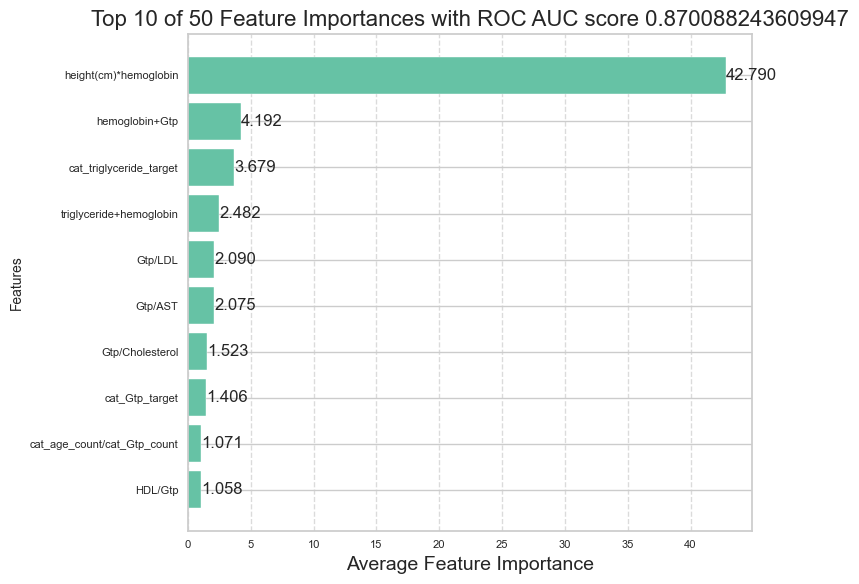

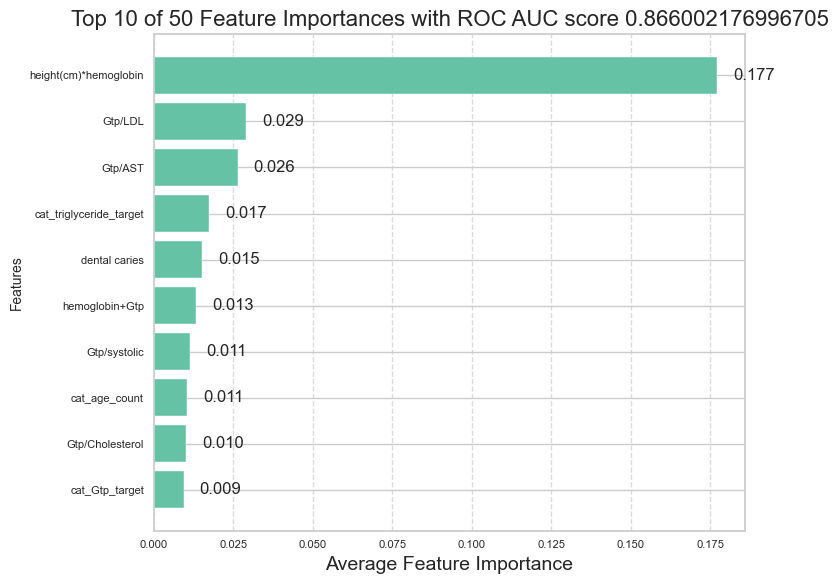

In [11]:
n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'cat')
n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'xgb')

In [12]:
n_imp_features=[*set(n_imp_features_xgb+n_imp_features_cat)]
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

66 features have been selected from three algorithms for the final model


In [13]:
X_train=X_train[n_imp_features]
X_test=X_test[n_imp_features]

In [14]:
correlation = train_cop.corr()['smoking'].sort_values(ascending=False)

print(correlation)

smoking                                                1.000000
height(cm)*hemoglobin                                  0.486660
triglyceride+hemoglobin                                0.474334
hemoglobin+Gtp                                         0.456702
cat_height(cm)_target                                  0.442127
                                                         ...   
HDL                                                   -0.256840
0.4166666666666667_cat_height(cm)cat_height(cm)_OHE   -0.267190
cat_HDL*cat_Gtp_count                                 -0.270393
cat_Gtp_count                                         -0.347599
HDL/Gtp                                               -0.403187
Name: smoking, Length: 377, dtype: float64


In [15]:
# 상관관계 계산
correlation = train_cop.corr()['smoking'].sort_values(ascending=False)

# PrettyTable로 변환
correlation_table = PrettyTable()
correlation_table.field_names = ["Feature", "Correlation"]

for feature, corr in correlation.items():
    correlation_table.add_row([feature, corr])

correlation_table_str = correlation_table.get_string()
print(correlation_table_str)

+--------------------------------------------------------------------+------------------------+
|                              Feature                               |      Correlation       |
+--------------------------------------------------------------------+------------------------+
|                              smoking                               |          1.0           |
|                       height(cm)*hemoglobin                        |  0.48666046927794043   |
|                      triglyceride+hemoglobin                       |  0.47433391143042414   |
|                           hemoglobin+Gtp                           |  0.45670230384480576   |
|                       cat_height(cm)_target                        |  0.44212690629673596   |
|                             hemoglobin                             |   0.4420365777609672   |
|                       cat_hemoglobin_target                        |   0.4420010701038623   |
|                             height(cm)

### MODELING

#### Class Weight

In [16]:
classes = np.unique(y_train)  
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])

class_counts = np.bincount(y_train_numeric)

total_samples = len(y_train_numeric)

class_weights = total_samples / (len(classes) * class_counts)

class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print("Class counts:", class_counts)
print("Total samples:", total_samples)
print("Class weights:", class_weights)
print("Class weights dictionary:", class_weights_dict)

Class counts: [110812  81911]
Total samples: 192723
Class weights: [0.86959445 1.17641709]
Class weights dictionary: {0: 0.8695944482547017, 1: 1.1764170868381536}


#### Models

In [17]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [18]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
)
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

In [19]:
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(16,  kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(4,  kernel_initializer='he_uniform', activation='relu'))
ann.add(Dropout(0.1))

ann.add(Dense(1,  kernel_initializer='he_uniform', activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer=sgd,metrics=['accuracy'])

In [20]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.1,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        xgb_params2=xgb_params.copy() 
        xgb_params2['subsample']= 0.3
        xgb_params2['max_depth']=8
        xgb_params2['learning_rate']=0.005
        xgb_params2['colsample_bytree']=0.9

        xgb_params3=xgb_params.copy() 
        xgb_params3['subsample']= 0.6
        xgb_params3['max_depth']=6
        xgb_params3['learning_rate']=0.02
        xgb_params3['colsample_bytree']=0.7      
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 8,
            'learning_rate': 0.02,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params2 = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.05,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params3=lgb_params.copy()  
        lgb_params3['subsample']=0.9
        lgb_params3['reg_lambda']=0.3461495211744402
        lgb_params3['reg_alpha']=0.3095626288582237
        lgb_params3['max_depth']=8
        lgb_params3['learning_rate']=0.007
        lgb_params3['colsample_bytree']=0.5

        lgb_params4=lgb_params2.copy()  
        lgb_params4['subsample']=0.7
        lgb_params4['reg_lambda']=0.1
        lgb_params4['reg_alpha']=0.2
        lgb_params4['max_depth']=10
        lgb_params4['learning_rate']=0.007
        lgb_params4['colsample_bytree']=0.5
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate': 0.1,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 120,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        cb_params2=  cb_params.copy()
        cb_params2['learning_rate']=0.01
        cb_params2['depth']=8
        
        cb_params3={
            'iterations': self.n_estimators,
            'random_strength': 0.1, 
            'one_hot_max_size': 70, 
            'max_bin': 100, 
            'learning_rate': 0.008, 
            'l2_leaf_reg': 0.3, 
            'grow_policy': 'Depthwise', 
            'depth': 10, 
            'max_bin': 200,
            'od_wait': 65,
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_params4=  cb_params.copy()
        cb_params4['learning_rate']=0.01
        cb_params4['depth']=12
        dt_params= {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 8, 'criterion': 'gini'}
        
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb2': lgb.LGBMClassifier(**lgb_params2),
            'cat': CatBoostClassifier(**cb_params),
            'lr': LogisticRegression(),
            'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state),
            'ann':ann                       
        }
        return models

#### Optimize Ensemble Weights

In [21]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=3000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", -1, 2) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        auc_score = roc_auc_score(y_true, weighted_pred)
        log_loss_score=log_loss(y_true, weighted_pred)
        return auc_score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

#### Model Fit

In [23]:
kfold = True
n_splits = 1 if not kfold else 5
random_state = 2023
random_state_list = [42] # used by split_data [71]
n_estimators = 9999 # 9999
early_stopping_rounds = 300
verbose = False

splitter = Splitter(kfold=kfold, n_splits=n_splits)

# Initialize an array for storing test predictions
test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
trained_models = {'xgb':[]}

    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of Regressor models
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        if ('cat' in name) or ("xgb" in name):
            if 'cat' ==name:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],#cat_features=cat_features,
                          early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            else:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name in 'ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=4, epochs=5,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        
        if name in 'ann':
            test_pred = np.array(model.predict(X_test))[:, 0]
            y_val_pred = np.array(model.predict(X_val))[:, 0]
        else:
            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

        score = roc_auc_score(y_val, y_val_pred)

        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] ROC AUC score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = roc_auc_score(y_val, y_val_pred)
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] ------------------>  ROC AUC score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    
    gc.collect()

xgb [FOLD-0 SEED-42] ROC AUC score: 0.87169
xgb3 [FOLD-0 SEED-42] ROC AUC score: 0.87283
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 65417, number of negative: 88761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8729
[LightGBM] [Info] Number of data points in the train set: 154178, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.424295 -> initscore=-0.305165
[LightGBM] [Info] Start training from score -0.305165
[LightGBM] [

In [24]:
# Calculate the mean ROC AUC  score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble ROC AUC score {mean_score:.5f} ± {std_score:.5f}')

# Print the mean and standard deviation of the ensemble weights for each model
print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble ROC AUC score 0.87439 ± 0.00246
--- Model Weights ---
xgb: 0.95043 ± 0.22342
xgb3: 0.97590 ± 0.47577
lgb: 0.51853 ± 0.25981
lgb2: 0.87705 ± 0.36943
cat: 0.55946 ± 0.25792
lr: -0.46499 ± 0.06569
dt: -0.22052 ± 0.02441
ann: 1.77554 ± 0.16758


#### Feature Importance Visualization

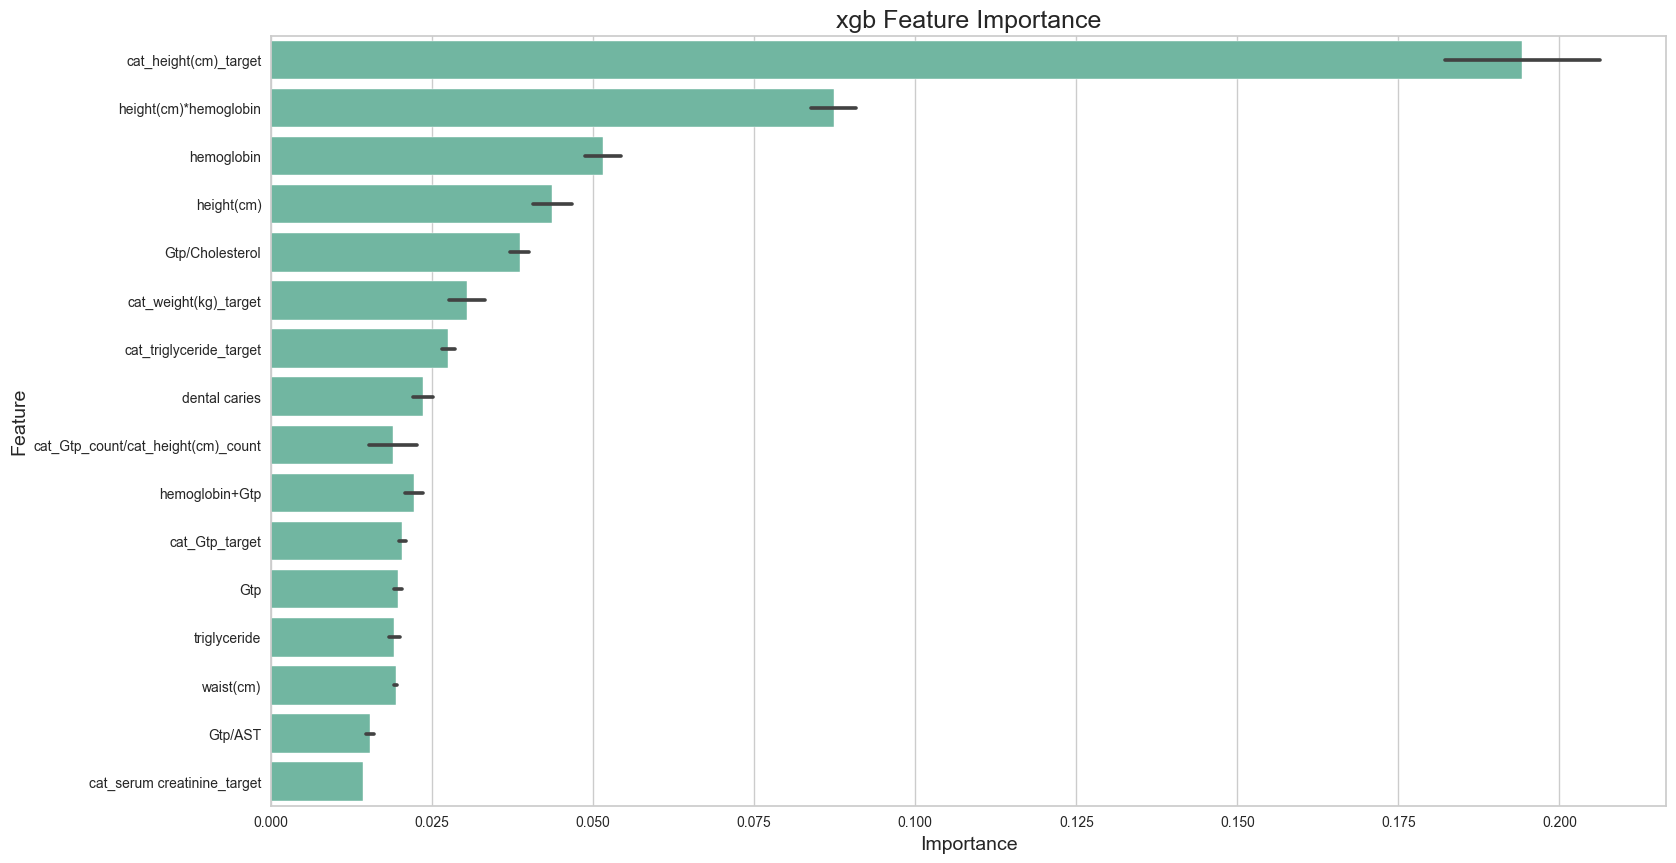

In [25]:
def visualize_importance(models, feature_cols, title, head=15):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    plt.figure(figsize=(18, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color= (0.4, 0.76, 0.65), errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

### Submission

In [ ]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
if len(test_predss) != len(sub):
    print(f"Length mismatch: test_predss has {len(test_predss)} elements, sub has {len(sub)} rows.")
    test_predss_adjusted = test_predss[:len(sub)]
    sub['smoking'] = test_predss_adjusted
else:
    sub['smoking'] = test_predss
    
sub.to_csv('submission_pure.csv',index=False)
sub.head()